In [11]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA
import pickle
import matplotlib.pyplot as plt
import gzip
from sklearn.preprocessing import StandardScaler

In [12]:
#dataset reading code is used as taught in the tutorial
def read_image_data(file):
    with gzip.open(file, 'r') as f:
        magic_number = int.from_bytes(f.read(4), 'big')
        image_count = int.from_bytes(f.read(4), 'big')
        row_count = int.from_bytes(f.read(4), 'big')
        column_count = int.from_bytes(f.read(4), 'big')
        image_data = f.read()
        images = np.frombuffer(image_data, dtype=np.uint8).reshape((image_count, row_count, column_count))
        return images
def read_label_data(file):
    with gzip.open(file, 'r') as f:
        magic_number = int.from_bytes(f.read(4), 'big')
        label_count = int.from_bytes(f.read(4), 'big')
        label_data = f.read()
        labels = np.frombuffer(label_data, dtype=np.uint8)
        return labels
train_x = read_image_data("./data/mnist/mnist/train-images-idx3-ubyte.gz")
train_y = read_label_data("./data/mnist/mnist/train-labels-idx1-ubyte.gz")
test_x = read_image_data("./data/mnist/mnist/t10k-images-idx3-ubyte.gz")
test_y = read_label_data("./data/mnist/mnist/t10k-labels-idx1-ubyte.gz")

In [13]:
train_x_reshaped = train_x.reshape((train_x.shape[0], train_x.shape[1]*train_x.shape[2]))
test_x_reshaped = test_x.reshape((test_x.shape[0], test_x.shape[1]*test_x.shape[2]))

In [14]:
train_x_reshaped = StandardScaler().fit_transform(train_x_reshaped)
test_x_reshaped = StandardScaler().fit_transform(test_x_reshaped)

In [15]:
def compute_accuracy(y_true, y_pred):
    correct_classif = 0
    total = len(y_true)
    for i in range(total):
        if(y_true[i] == y_pred[i]):
            correct_classif += 1
    return correct_classif / total

In [16]:
n_comps = [15, 8, 3]

In [17]:
accuracy_vals = {}
for n_comp in n_comps:

    print(f"---------- n_components = {n_comp} ------------------\n")
    #transforming the dataset
    pca = PCA(n_components=n_comp)
    pca_transformed_train_x = pca.fit_transform(train_x_reshaped)
    pca_transformed_test_x = pca.transform(test_x_reshaped)
    print(f"Transformed train_x shape : {pca_transformed_train_x.shape}")
    print(f"Tranformed test_x shape : {pca_transformed_test_x.shape}")

    #applying LDA
    clf = LDA()
    clf.fit(pca_transformed_train_x, train_y)
    pickle.dump(clf, open(f'./models/q2_lda_n_comps_{n_comp}.sav', 'wb'))
    #prediction part
    y_preds = clf.predict(pca_transformed_test_x)
    accuracy = compute_accuracy(test_y, y_preds)
    accuracy_vals[n_comp] = accuracy
    print(f"Accuracy on test dataset = {accuracy}")
    print("\n----------------------------------------------------\n")


---------- n_components = 15 ------------------

Transformed train_x shape : (60000, 15)
Tranformed test_x shape : (10000, 15)
Accuracy on test dataset = 0.7898

----------------------------------------------------

---------- n_components = 8 ------------------

Transformed train_x shape : (60000, 8)
Tranformed test_x shape : (10000, 8)
Accuracy on test dataset = 0.7268

----------------------------------------------------

---------- n_components = 3 ------------------

Transformed train_x shape : (60000, 3)
Tranformed test_x shape : (10000, 3)
Accuracy on test dataset = 0.4768

----------------------------------------------------



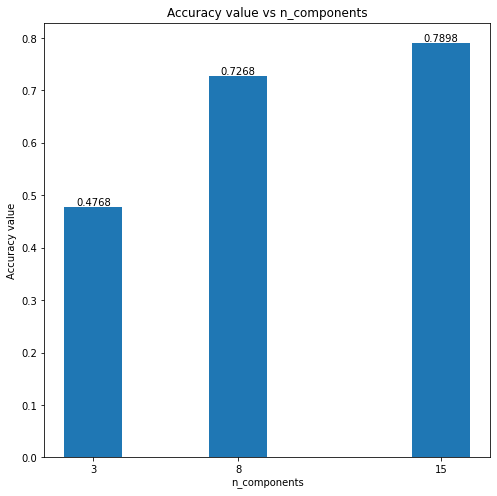

In [18]:
acc_val = accuracy_vals.values()
fig, ax = plt.subplots(figsize=(8, 8))
bars = ax.bar(n_comps, acc_val, width=2)
ax.set_xticks(n_comps)
ax.bar_label(bars)
ax.set_xlabel("n_components")
ax.set_ylabel("Accuracy value")
plt.title("Accuracy value vs n_components")
plt.show()